In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import keras

In [54]:
(data, _), (_, _) = keras.datasets.cifar10.load_data()
np.random.shuffle(data)
data = data[:40]
data = data/255
data = np.clip(np.array([cv2.resize(
    data_,
    dsize=(data.shape[1]*4,data.shape[2]*4),
    interpolation=cv2.INTER_LANCZOS4) for data_ in data]), 0, 1) - 0.5

In [55]:
data_std = np.std(data, axis=0)
key_norm = np.reshape(data_std, (1,-1))

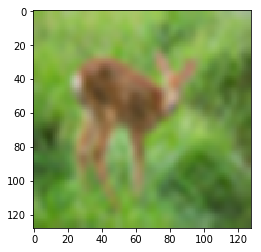

In [56]:
plt.imshow(data[np.random.randint(0,len(data))] + 0.5, cmap='gray')
plt.show()

In [57]:
keys = np.exp(np.random.rand(*data.shape) *2*np.pi*1j)
keys = np.reshape(keys, (data.shape[0],-1))

In [58]:
keys = np.concatenate([data[-1:],data[:-1]])
keys = np.reshape(keys, (data.shape[0],-1))
keys = np.exp((keys/key_norm) *2*np.pi*1j)

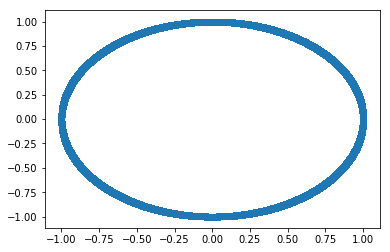

In [59]:
plt.scatter(np.real(keys), np.imag(keys))
plt.show()

In [60]:
ps = []
for i in range(400):
    p = np.arange(data.shape[1]*data.shape[2]*data.shape[3])
    np.random.shuffle(p)
    ps.append(p)
ps = np.array(ps)

In [61]:
cs = np.array([np.sum(np.reshape(keys[:,p],data.shape) * data, axis=0) for p in ps])

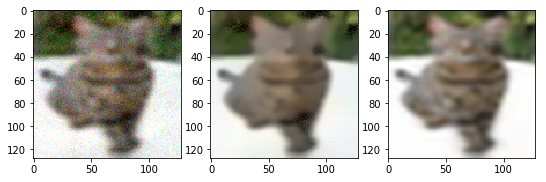

In [62]:
i = np.random.randint(0,len(data))
y = np.array([
    np.conj(np.reshape(keys[i,p],data.shape[1:]))*c
    for p,c in zip(ps,cs)])
y = np.real(y)
y = np.mean(y + 0.5, axis=0)
y = np.clip(y , 0, 1)
yd = np.float32(cv2.fastNlMeansDenoisingColored(np.uint8(np.round(y*255)),None,10,10,7,21))/255
plt.figure(figsize=(9,6))
plt.subplot(1,3,1)
plt.imshow(y, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(yd, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(data[i] + 0.5, cmap='gray')
plt.show()

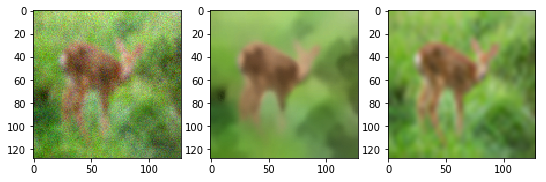

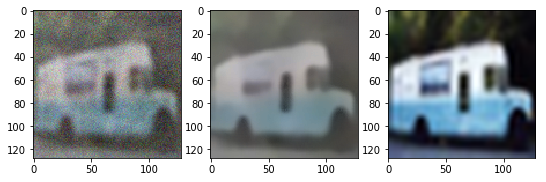

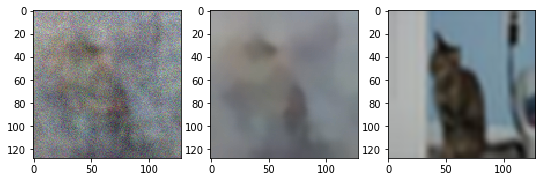

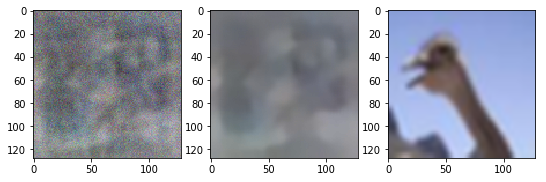

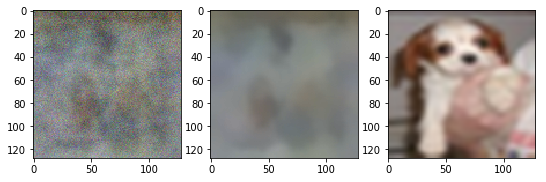

In [99]:
s = np.random.randint(0,data.shape[0])
k = keys[s]
for i in range(min(data.shape[0],5)):
    y = np.array([
        np.conj(np.reshape(k[p],data.shape[1:]))*c
        for p,c in zip(ps,cs)])
    y = np.real(y)
    y = np.mean(y + 0.5, axis=0)
    y = np.clip(y , 0, 1)
    yd = np.float32(cv2.fastNlMeansDenoisingColored(np.uint8(np.round(y*255)),None,10,10,7,21))/255
    k = np.reshape(yd - 0.5, (-1,))
    k = np.exp((k/key_norm[0]) *2*np.pi*1j)
    plt.figure(figsize=(9,6))
    plt.subplot(1,3,1)
    plt.imshow(y, cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yd, cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(data[(s+i)%data.shape[0]] + 0.5, cmap='gray')
    plt.show()